# Problem 3: Modelling disease using the SIR equations

## Task 1: Understanding the pseudo code

### Code structure indicated by bold lines




**Initialisation - randomly choose the 1% to start immune and 1 to be the initially infected**



    #p[]>:1=susceptible, 0= Immunised, 2 = Infected

    #set parameters

    seed = randomize() # seed for random number generator

    nums = 1000 # number of students

    fract = 0.01 # fract initially immune

    recovr = 0.2 # chance recovering / day

    num_infect = 1 # number infected/day

    numd = 40 # number of days

    reps = 40 # number of repeats


**Define the arrays for the infected and susceptible students**

    data = Array(1..numd) # array for infected

    sdata = Array(1..numd) # array of susceptibles


    #array P:0=immune, 1=susceptible, 2=infected

    remov = 0 # number removed

**Repetition loop - to get an average across a specified number of repetitions to show representative data**



    for k from 1 to reps do # loop for repeat calc'n

    #set up P array with values 0, 1, and 2

        P=Array(1..nums) # student array to zero

**Loop to set the susceptible**

        for i from 1 to nums do # choose susceptibles

            P[i]=1 # all susceptible

        end do


        fn = trunc(fract*nums) # make into integer

        n = 0

**Loop to discount immune from the infection**


        while n < fn do # exact fract*nums immune

            rr = rand(1..nums)

            ra = rr()

            if P[ra] <> 0 then # <> not equal sign

                P[ra] = 0

                n = n+1

            end if

        end do

        n = 0
        
**Loop to infect one person randomly each day**

        while n < 1 do #1 infected not one of immune

            rr = rand(1..nums)

            ra = rr()

            if P[ra] = 1 then

                P[ra] = 2

                n = 1

            end if

        end do


    #the main part of calculation follows
    
**For each day and each student, the loop selects the infected and also calculates the probability of infected people recovering**

        for j from 1 to numd do # loop over days

            for i from 1 to nums do # loop students

                if P[i] = 2 then #spread infection

                    for ii from 1 to num_infect do

                        ra=rr() # infect new student

                        if P[ra]=1 then

                            P[ra]=2

                            remov=remov+1 # number removed

                        end if

                    end do

                end if

                if ran() < recovr then # chance of recovery

                    ra=rr()

                    if P[ra] = 2 then P[ra]=0 end if

                end if

            end do # end loop i

            c=0: s=0

**Loop that adds up the total removed and infected**

            for i from 1 to nums do # find number infected

                if P[i] = 2 then c = c+1 end if

                if P[i] = 1 then s = s+1 end if

            end do
            
**Storing the overall data**

            data[j] = data[j] + c # number infected

            sdata[j] = sdata[j] + s # number suscept

        end do # end loop j days

    end do # end loop repeats

**Calculating the average across all repetitions**

    num_infected = remov*1.0/reps # total number of students infected in 40 days

## Task 2: Plotting SIR data

In [1]:
# Imports
import numpy as np
import random
import matplotlib.pyplot as plt

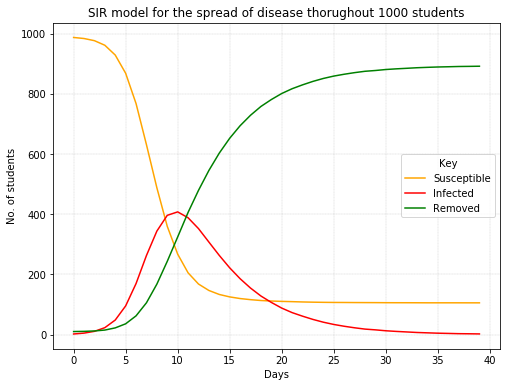

In [2]:
# Python code

# p[]>:1=susceptible, 0= Immunised, 2 = Infected
    
# seed for random number generator
seed = random.randint(0, 2**32 - 1)
random.seed(seed)

# set parameters
nums = 1000 # number of students
fract = 0.01 # fract initially immune
recovr = 0.2 # chance recovering / day
num_infect = 1 # number infected/day
numd = 40 # number of days
reps = 40 # number of repeats

# array P:0=immune, 1=susceptible, 2=infected
data = np.zeros(numd) # array for infected
sdata = np.zeros(numd) # array of susceptibles

remov = 0 # number removed

for k in range(reps): # loop for repeat calc'n
# set up P array with values 0, 1, and 2
    P = np.ones(nums) # students all start susceptible (1)
        
    fn = int(fract * nums)  # Convert to integer
    n = 0
    
    while n < fn: # exact fract*nums immune
        ra = random.randint(0, nums - 1)
    
        if P[ra] != 0: # <> not equal sign
            P[ra] = 0
            n = n+1
            
    n = 0
    
    while n < 1: #1 infected not one of immune
        ra = random.randint(0, nums - 1)
        
        if P[ra] == 1:
            P[ra] = 2
            n = 1
    
    
# the main part of calculation follows

    for j in range(numd): # loop over days

        for i in range(nums): # loop students
        
            if P[i] == 2: #spread infection
            
                for ii in range(num_infect):
                    ra = random.randint(0, nums - 1) # infect new student randomly
                    
                    if P[ra] == 1:
                        P[ra] = 2
                        remov = remov + 1 # number removed                        
            
            if random.random() < recovr: # chance of recovery
                ra = random.randint(0, nums - 1)
                
                if P[ra] == 2:
                    P[ra] = 0
        
        c, s = 0, 0
            
        for i in range(nums): # find number infected
        
            if P[i] == 2:
                c += 1
            
            if P[i] == 1:
                s += 1

        data[j] += c # number infected
        sdata[j] += s # number susceptible
        
avg_infected = data / reps # total number of students infected in 40 days

avg_susceptible = sdata / reps

avg_removed = nums - (avg_infected + avg_susceptible)

# Plotting the figure
plt.figure(figsize=(8, 6))
plt.plot(range(numd), avg_susceptible, label="Susceptible", color="orange")
plt.plot(range(numd), avg_infected, label="Infected", color="red")
plt.plot(range(numd), avg_removed, label="Removed", color="green")

plt.xlabel("Days")
plt.ylabel("No. of students")
plt.title("SIR model for the spread of disease thorughout 1000 students")
plt.legend(title = "Key")
plt.grid(True, which="both", linestyle="--", linewidth=0.3)
plt.show()

### Task 2ii: Issues with the model

#### Contentious assumptions of the model

1. Exactly 1 person is infected per day
2. The 1 person infected per day must be susceptible - not immune or been previously infected
3. Once a person has been infected, they can't be re-infected
4. Infection isn't contact based, just completely random, so accurately models numbers but not real world disease

None of these assumptions are completely correct if the goal is to model real life disease

## Task 3: Changing the parameters


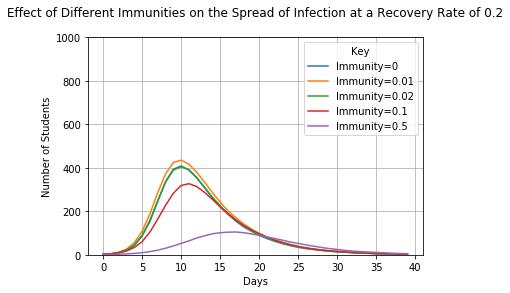

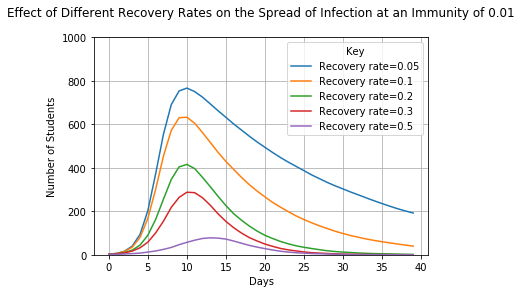

In [3]:
# Defining a function to repeat the simulation
# with different parameters of fraction immune and recovery rate

def sir_model(fract, recovr):
    global nums, numd, reps, num_infect

    data = np.zeros(numd)  # Array for infected
    sdata = np.zeros(numd)  # Array for susceptibles
    remov = 0  # Number removed
    
    for k in range(reps):  # Repeat calculations
        P = np.ones(nums)  # All students susceptible initially
        
        # Set immune students
        fn = int(fract * nums)  
        for _ in range(fn):
            ra = random.randint(0, nums - 1)
            P[ra] = 0  # Mark as immune

        # Introduce an infected student
        while True:
            ra = random.randint(0, nums - 1)
            if P[ra] == 1:
                P[ra] = 2  # Mark as infected
                break

        # Main simulation loop over days
        for j in range(numd):
            for i in range(nums):
                if P[i] == 2:  # Spread infection
                    for _ in range(num_infect):
                        ra = random.randint(0, nums - 1)
                        if P[ra] == 1:
                            P[ra] = 2
                            remov += 1

                if random.random() < recovr:  # Recovery chance
                    ra = random.randint(0, nums - 1)
                    if P[ra] == 2:
                        P[ra] = 0  # Mark as recovered

            # Count susceptible and infected
            c, s = np.sum(P == 2), np.sum(P == 1)
            data[j] += c
            sdata[j] += s

    # Compute averages
    avg_infected = data / reps
    avg_susceptible = sdata / reps
    avg_removed = nums - (avg_infected + avg_susceptible)
    
    return avg_susceptible, avg_infected, avg_removed

# Different parameter values to test
fract_values = [0, 0.01, 0.02, 0.1, 0.5]  # Initial immunity fraction
recovr_values = [0.05, 0.1, 0.2, 0.3, 0.5]  # Recovery rate

# plt.figure(figsize=(12, 8))

# Loop through parameter combinations
for fract in fract_values:
    avg_susceptible, avg_infected, avg_removed = sir_model(fract, 0.2)
    plt.plot(range(numd), avg_infected, label=f"Immunity={fract}", linestyle="-")
    
plt.xlabel("Days")
plt.ylabel("Number of Students")
plt.ylim(0, 1000)
plt.title("Effect of Different Immunities on the Spread of Infection at a Recovery Rate of 0.2\n")
plt.legend(title = "Key")
plt.grid(True)

plt.show()

    
for recovr in recovr_values:
    avg_susceptible, avg_infected, avg_removed = sir_model(0.01, recovr)
    plt.plot(range(numd), avg_infected, label= f"Recovery rate={recovr}", linestyle="-")

plt.xlabel("Days")
plt.ylabel("Number of Students")
plt.ylim(0, 1000)
plt.title("Effect of Different Recovery Rates on the Spread of Infection at an Immunity of 0.01\n")
plt.legend(title = "Key")
plt.grid(True)

plt.show()



### Observations based on the graphs above

These graphs clearly show the different impacts of recovery rate and initial fraction of the population that are immune. 

Low recovery rates cause the maximum number of infected students to increase drastically, they also lengthen the duration of the epidemic significantly, with 100s of students still being infected at the 40 day mark. The peak of the infection, however, stays relatively constant at around day 10-12.

Low immunities also increase the maximum number of infected students, but to a lesser extent, with a maximum of around 425 students when none of the population begins immune. At high immunities eg. 50%, the length of the epidemic increases negligibly if at all, but the peak of infection occurs much later, at around day 19 in comparison to low immunity rates at day 11.

## Task 4: Allowing re-infection

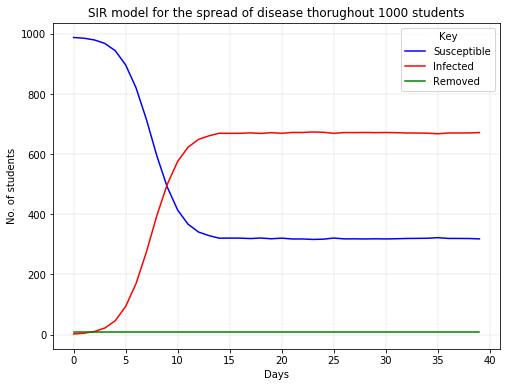

In [4]:
# Allowing re-infection

# p[]>:1=susceptible, 0= Immunised, 2 = Infected
    
# seed for random number generator
seed = random.randint(0, 2**32 - 1)
random.seed(seed)

# set parameters
nums = 1000 # number of students
fract = 0.01 # fract initially immune
recovr = 0.2 # chance recovering / day
num_infect = 1 # number infected/day
numd = 40 # number of days
reps = 40 # number of repeats

# array P:0=immune, 1=susceptible, 2=infected
data = np.zeros(numd) # array for infected
sdata = np.zeros(numd) # array of susceptibles

remov = 0 # number removed

for k in range(reps): # loop for repeat calc'n
# set up P array with values 0, 1, and 2
    P = np.ones(nums) # students all start susceptible (1) 
        
    fn = int(fract * nums)  # Convert to integer
    n = 0
    
    while n < fn: # exact fract*nums immune
        ra = random.randint(0, nums - 1)
    
        if P[ra] != 0: # <> not equal sign
            P[ra] = 0
            n = n+1
            
    n = 0
    
    while n < 1: #1 infected not one of immune
        ra = random.randint(0, nums - 1)
        
        if P[ra] == 1:
            P[ra] = 2
            n = 1
    
    
# the main part of calculation follows

    for j in range(numd): # loop over days

        for i in range(nums): # loop students
        
            if P[i] == 2: #spread infection
            
                for ii in range(num_infect):
                    ra = random.randint(0, nums - 1) # infect new student randomly
                    
                    if P[ra] == 1:
                        P[ra] = 2
                        remov += 1 # number removed                        
            
            if random.random() < recovr: # chance of recovery
                ra = random.randint(0, nums - 1)
                
                if P[ra] == 2:
                    P[ra] = 1
        
        c, s = 0, 0
            
        for i in range(nums): # find number infected
        
            if P[i] == 2:
                c += 1
            
            if P[i] == 1:
                s += 1
        
        data[j] += c # number infected
        sdata[j] += s # number susceptible
        
avg_infected = data / reps # total number of students infected in 40 days

avg_susceptible = sdata / reps

avg_removed = nums - (avg_infected + avg_susceptible)

# Plotting the figure
plt.figure(figsize=(8, 6))
plt.plot(range(numd), avg_susceptible, label="Susceptible", color="blue")
plt.plot(range(numd), avg_infected, label="Infected", color="red")
plt.plot(range(numd), avg_removed, label="Removed", color="green")

plt.xlabel("Days")
plt.ylabel("No. of students")
plt.title("SIR model for the spread of disease thorughout 1000 students")
plt.legend(title = "Key")
plt.grid(True, which="both", linestyle="--", linewidth=0.3)
plt.show()

#### Observations for re-infection

If people can be re-infected the model represents a more endemic-type disease as people will continue to recover and get infected, reaching a sort of equilibrium where the maximum number of people infected will be more or less sustained, unless there's a very high recovery rate.

These type of diseases don't tend to reach a peak and die out, so the disease will continue to affect the population with an infection-recovery cycle until there's medical intervention.

Additionally, only the initially immune students contribute to the 'Removed' part of the population.

## Bonus Point

I deserve a bonus point because I produced additional graphs that display the effect of changing the immunity and recovery rate, as well as identifying the differences

## Self-assessment

1i - **0.5 marks**

Identified the structure - addressing all of the points in the 'strategy' paragraph

1ii - **0.5 marks**

Identified and explained the main loops

2i - **2 marks**

I successfully translated the code into python and achieved the expected SIR model graph

2ii - **0.8 marks**

I have discussed the points that I think are relevant in terms of the practicality of the model, I'm not sure if there's anything that the code does wrong in comparison to what it's trying to achieve, but a code could be written that is aiming for a more realistic representation of the spread of disease

3 - **1.8 marks**

Not sure about general rules but I have commented on what I think the graphs show and the significance of that in terms of the disease. The graphs show only the most important information (infection curve) for different values, on the same plot so they can be easily compared.

4 - **1 mark**

Correctly edited the code to allow people to be re-infected, with a plot that shows that the disease would no longer die out of its own accord

5 - **2 marks**

The notebook is presented well with clear titles and legends on the graphs, showing clear trends

6 - **1 mark**

I went above what was asked for the changing parameters question



## Declaration of Academic Integrity

This is all my own work and I have marked it fairly